# Project #1 : Navigation

## DQN Training Algorithm

---

This notebook implements my solution for the Navigation project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

I implemented the Deep Q-Network (DQN) training algorithm to train an agent to collect yellow bananas in a Unity ML-Agents environment. 

### 1. Install Python Packages

If you haven't done so already, run this command to install a few packages in your computing environment.  This line may take a few minutes to run!

In [1]:
#!pip -q install ./python

### 2. Import libraries

If the code cell below return an error, revisit the Udacity project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from collections import deque
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

# load the Unity environment wrapper class
from environment import Environment

# load the Agent class
from dqn_agent import Agent

### 3. The Deep Q-Network (DQN) Algorithm

We will use the DQN algrithm to train the agent

In [3]:
# The Deep Q-Network (DQN) Algorithm

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning algorithm.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'model_weights.pth')
            break
    
    return scores

### 3. Initiallizing the Environment

**_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = Environment(file_name="Banana.app")
```

In [4]:
# Find the full filename to the Unity environment file
path = !pwd
filename = path[0] + "/Banana.app"

In [5]:
# Initiate the environment
env = Environment(filename, train_mode=True, no_graphics=True, seed=0)
state = env.reset()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 4. Initiallizing the Agent

In [6]:
# Initiate the agent
agent = Agent(state_size=env.state_size, action_size=env.action_size, seed=0)

### 5. Train the agent

In [7]:
# Set how many pushups you want Agent 007 to do during boot camp
n_episodes = 2500

# run the Deep Q-Network algorithm
scores = dqn(n_episodes=n_episodes)

Episode 100	Average Score: 0.70
Episode 200	Average Score: 3.93
Episode 300	Average Score: 7.34
Episode 400	Average Score: 10.31
Episode 500	Average Score: 12.93
Episode 503	Average Score: 13.06
Environment solved in 403 episodes!	Average Score: 13.06


In [8]:
# close the environment
env.close()

### 6. Plot and save the Training Curve

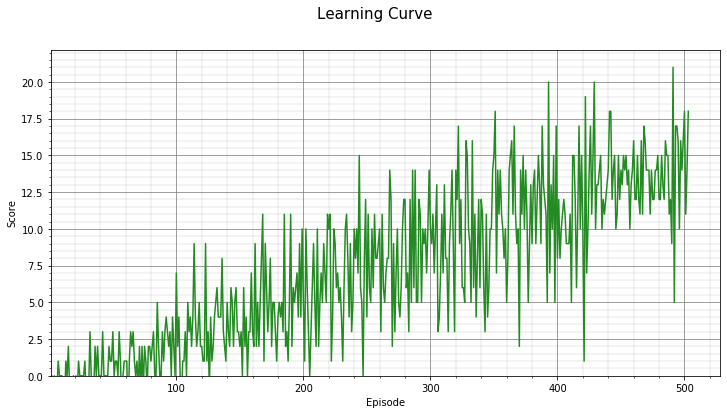

In [9]:
# plot the scores
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle("Learning Curve", fontsize=15)
ax.plot(np.arange(1, len(scores)+1), scores, color="forestgreen", label="line")
plt.xlim(left=1)
plt.ylim(bottom=0)
ax.set_xlabel("Episode")
ax.set_ylabel("Score")
ax.grid(True)
ax.grid(b=True, which='major', color='gray', linestyle='-', linewidth=0.75)
ax.minorticks_on()
ax.grid(b=True, which='minor', color='gray', linestyle='-', alpha=.75, linewidth=0.25)
plt.show()

#  save plot to a file
fig.savefig("dqn_agent_learning_curve.jpg")